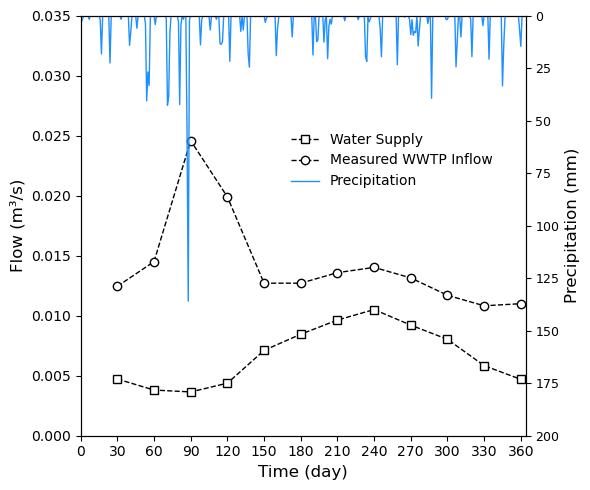

In [1]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data from measurements
f = np.loadtxt('WWTP_2010.txt')  # MGD

# Convert time and values
time_x = f[:, 0]  # months
flow_y = f[:, 1] * 0.043812636574074  # CMS (Measured WWTP Inflow)
rain_y = f[:, 3] * 0.043812636574074  # CMS

# Load precipitation data from simulation
prec = np.loadtxt('Precip_2010.txt')
time_day = np.arange(0, 365, 1)  # daily time axis for precipitation

# Water Supply data (new values)
dwflow_y = np.array([
    0.004721554, 0.003803406, 0.003648215, 0.004376016,
    0.007106057, 0.008454645, 0.009632263, 0.010508809,
    0.00921054, 0.00802847, 0.005836927, 0.004693928
])

# Time points for Water Supply (middle of each month)
dwflow_x = np.array([15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]) + 15

# Plotting
fig, ax = plt.subplots()
ax.set_ylim(0, 0.035)

# Twin axis for precipitation
ax2 = ax.twinx()

# Plot precipitation (secondary y-axis, reversed)
ax2.plot(time_day, prec, color="dodgerblue", lw=1, label="Precipitation")
ax2.set_ylabel("Precipitation (mm)", color="black", fontsize=12)
ax2.axis([min(time_day), max(time_day), max(prec), min(prec)])
ax2.set_ylim(200, 0)

# Adjust font size for the y-axis tick labels of the second axis (Precipitation)
ax2.tick_params(axis='y', labelsize=9)  # تغییر اندازه فونت اعداد محور Y دوم

# Plot Water Supply
ax.plot(dwflow_x, dwflow_y, '--k', marker='s', markerfacecolor='white', lw=1, label='Water Supply')

# Plot Measured WWTP Inflow
ax.plot(dwflow_x, flow_y, '--ok', lw=1, mfc='white', label='Measured WWTP Inflow')

# Legend
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.75), fontsize=10, frameon=False)

# X-axis setup
ax.set_xlabel('Time (day)', fontsize=12)
ax.set_xticks(np.arange(0, 365, 30))
ax.set_xticklabels(np.arange(0, 365, 30), fontsize=10)

# Y-axis label
ax.set_ylabel("Flow (m³/s)", color="k", fontsize=12)

# Adjust font size for axis ticks
ax.tick_params(axis='both', labelsize=10)  # برای هر دو محور X و Y

# Optional plot label
ax.text(0.01, 0.88, "", transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left', weight='bold')



# ✅ Set figure size with width 140 mm and fixed height
#width_mm = 140
#height_mm = 110  # ثابت نگه داشتن ارتفاع
#width_inch = width_mm / 25.4
#height_inch = height_mm / 25.4
#fig.set_size_inches(width_inch, height_inch)

fig.set_size_inches(6, 5)

# Use tight_layout to ensure the labels are not cut off
plt.tight_layout()

# Save figures
plt.savefig('WWTP-WS-P.png', dpi=1200)
plt.savefig('WWTP-WS-P.eps', dpi=1200)
plt.show()


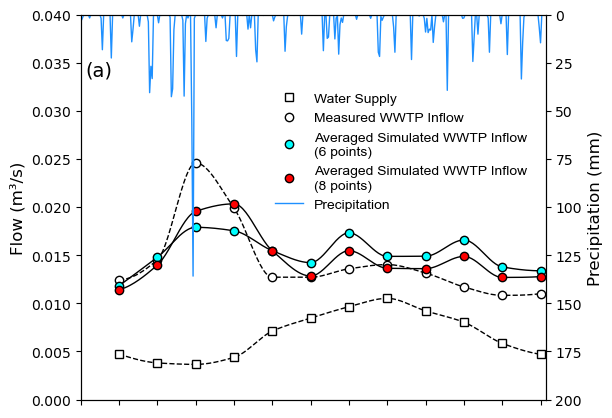

In [26]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Time vector
new_time_x = np.array([15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]) + 15

# New averaged simulated data for 6 and 8 Nodes
scenario_6nodes = np.array([
    0.011817109, 0.014777727, 0.017890836, 0.017529178, 0.015463832, 0.014222895,
    0.017317446, 0.01487021, 0.01488694, 0.016574024, 0.013778974, 0.013372757,
])

scenario_8nodes = np.array([
    0.011393792, 0.013971381, 0.019538145, 0.020327473, 0.015454129, 0.012829035,
    0.015459431, 0.013635553, 0.013593817, 0.014868039, 0.012683247, 0.012766606,
])

# Water supply data
dwflow_x = new_time_x
dwflow_y = np.array([
    0.004721554, 0.003803406, 0.003648215, 0.004376016, 
    0.007106057, 0.008454645, 0.009632263, 0.010508809, 
    0.00921054, 0.00802847, 0.005836927, 0.004693928
])

# Load measured inflow and precipitation
f = np.loadtxt('WWTP_2010.txt')  # MGD
time_x = f[:, 0] + 15
flow_y = f[:, 1] * 0.043812636574074

prec = np.loadtxt('Precip_2010.txt')
time_day = np.arange(0, 365, 1)

# Plotting
fig, ax = plt.subplots()
ax.set_ylim(0, 0.04)

# Twin axis for precipitation
ax2 = ax.twinx()
ax2.plot(time_day, prec, color="dodgerblue", lw=1, label="Precipitation")
ax2.set_ylabel("Precipitation (mm)", color="black", fontsize=12)
ax2.axis([min(time_day), max(time_day), max(prec), min(prec)])
ax2.set_ylim(200, 0)

# Monotone smooth curve function using PCHIP
def smooth_monotone(x, y, num=300):
    interp = PchipInterpolator(x, y)
    x_smooth = np.linspace(x.min(), x.max(), num)
    y_smooth = interp(x_smooth)
    return x_smooth, y_smooth

# Water Supply smooth line
x_smooth, y_smooth = smooth_monotone(dwflow_x, dwflow_y)
ax.plot(x_smooth, y_smooth, '--k', lw=1)
ax.plot(dwflow_x, dwflow_y, 's', markerfacecolor='white', color='black', label='Water Supply')

# Measured WWTP Inflow smooth line
x_smooth, y_smooth = smooth_monotone(time_x, flow_y)
ax.plot(x_smooth, y_smooth, '--', color='black', lw=1)
ax.plot(time_x, flow_y, 'o', markerfacecolor='white', color='black', label='Measured WWTP Inflow')

# Simulated inflows smooth lines
x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_6nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)
ax.plot(new_time_x, scenario_6nodes, 'o', markerfacecolor='cyan', color='black', label='Averaged Simulated WWTP Inflow\n(6 points)')

x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_8nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)
ax.plot(new_time_x, scenario_8nodes, 'o', markerfacecolor='red', color='black', label='Averaged Simulated WWTP Inflow\n(8 points)')

# Legend and labels
fig.legend(loc='upper right', bbox_to_anchor=(0.89, 0.75), frameon=False, prop={'size': 10, 'family': 'Arial'})

# X-axis customization
ax.set_xticks(np.arange(0, 365, 30))
ax.set_xticklabels([])

# Y-axis
ax.set_ylabel("Flow (m³/s)", color="k", fontsize=12)
fig.set_size_inches(6, 5)

# Label in corner
ax.text(0.01, 0.88, '(a)', transform=ax.transAxes, fontsize=14, va='top', ha='left')

# Save outputs
plt.savefig('simopt_6_8n.png', dpi=1200, bbox_inches='tight') 
plt.savefig('simopt_6_8n.eps', dpi=1200, bbox_inches='tight')  

plt.show()


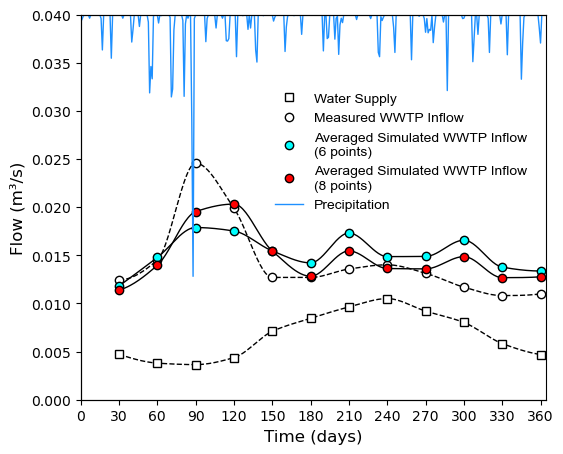

In [30]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Time vector
new_time_x = np.array([15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]) + 15

# New averaged simulated data for 6 and 8 Nodes
scenario_6nodes = np.array([0.011817109, 0.014777727, 0.017890836, 0.017529178, 0.015463832,
                            0.014222895, 0.017317446, 0.01487021, 0.01488694, 0.016574024,
                            0.013778974, 0.013372757])
scenario_8nodes = np.array([0.011393792, 0.013971381, 0.019538145, 0.020327473, 0.015454129,
                            0.012829035, 0.015459431, 0.013635553, 0.013593817, 0.014868039,
                            0.012683247, 0.012766606])

# Water supply data
dwflow_x = new_time_x
dwflow_y = np.array([0.004721554, 0.003803406, 0.003648215, 0.004376016, 0.007106057,
                     0.008454645, 0.009632263, 0.010508809, 0.00921054, 0.00802847,
                     0.005836927, 0.004693928])

# Load measured inflow and precipitation
f = np.loadtxt('WWTP_2010.txt')  # MGD
time_x = f[:, 0] + 15
flow_y = f[:, 1] * 0.043812636574074
rain_y = f[:, 3] * 0.043812636574074

prec = np.loadtxt('Precip_2010.txt')
time_day = np.arange(0, 365, 1)

# تابع برای منحنی صاف
def smooth_monotone(x, y, num=300):
    interp = PchipInterpolator(x, y)
    x_smooth = np.linspace(x.min(), x.max(), num)
    y_smooth = interp(x_smooth)
    return x_smooth, y_smooth

# Plotting
fig, ax = plt.subplots()
ax.set_ylim(0, 0.04)

# Twin axis for precipitation
ax2 = ax.twinx()
ax2.plot(time_day, prec, color="dodgerblue", lw=1, label="Precipitation")
ax2.set_ylabel("")
ax2.get_yaxis().set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.axis([min(time_day), max(time_day), max(prec), min(prec)])
ax2.set_ylim(200, 0)

# Water Supply smooth line
x_smooth, y_smooth = smooth_monotone(dwflow_x, dwflow_y)
ax.plot(x_smooth, y_smooth, '--k', lw=1)
ax.plot(dwflow_x, dwflow_y, 's', markerfacecolor='white', color='black', label='Water Supply')

# Measured WWTP Inflow smooth line
x_smooth, y_smooth = smooth_monotone(time_x, flow_y)
ax.plot(x_smooth, y_smooth, '--', color='black', lw=1)
ax.plot(time_x, flow_y, 'o', markerfacecolor='white', color='black', label='Measured WWTP Inflow')

# Simulated inflows smooth lines
x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_6nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)
ax.plot(new_time_x, scenario_6nodes, 'o', markerfacecolor='cyan', color='black', label='Averaged Simulated WWTP Inflow\n(6 points)')

x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_8nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)
ax.plot(new_time_x, scenario_8nodes, 'o', markerfacecolor='red', color='black', label='Averaged Simulated WWTP Inflow\n(8 points)')

# Legend and labels
fig.legend(loc='upper right', bbox_to_anchor=(0.89, 0.75), frameon=False, prop={'size': 10, 'family': 'Arial'})
ax.set_xticks(np.arange(0, 365, 30))
ax.set_xticklabels(np.arange(0, 365, 30), fontsize=10)
ax.set_xlabel('Time (days)', fontsize=12)
ax.set_ylabel("Flow (m³/s)", color="k", fontsize=12)

fig.set_size_inches(6, 5)
ax.text(0.01, 0.88, '', transform=ax.transAxes, fontsize=14, va='top', ha='left')

# Save outputs
plt.savefig('simopt_6,8n_pre.png', dpi=1200, bbox_inches='tight') 
plt.savefig('simopt_6,8n_pre.eps', dpi=1200, bbox_inches='tight')  

plt.show()


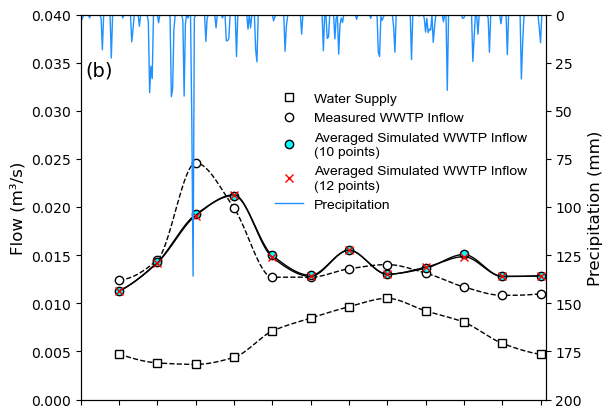

In [28]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Time vector
new_time_x = np.array([15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]) + 15

# New averaged simulated data for 10 and 12 Nodes
scenario_10nodes = np.array([
    0.011227649,
    0.014257776,
    0.019221471,
    0.02118647,
    0.014981269,
    0.012898974,
    0.015514118,
    0.013026312,
    0.013639702,
    0.015067182,
    0.012790201,
    0.012854424,
])

scenario_12nodes = np.array([
    0.011277843,
    0.014193241,
    0.019106222,
    0.021274164,
    0.014773765,
    0.012792798,
    0.015518916,
    0.013008701,
    0.013734135,
    0.014839875,
    0.012784453,
    0.01285987,
])

# Water supply data
dwflow_x = new_time_x
dwflow_y = np.array([
    0.004721554, 0.003803406, 0.003648215, 0.004376016, 
    0.007106057, 0.008454645, 0.009632263, 0.010508809, 
    0.00921054, 0.00802847, 0.005836927, 0.004693928
])

# Load measured inflow and precipitation
f = np.loadtxt('WWTP_2010.txt')  # MGD
time_x = f[:, 0] + 15
flow_y = f[:, 1] * 0.043812636574074

prec = np.loadtxt('Precip_2010.txt')
time_day = np.arange(0, 365, 1)

# Plotting
fig, ax = plt.subplots()
ax.set_ylim(0, 0.04)

# Twin axis for precipitation
ax2 = ax.twinx()
ax2.plot(time_day, prec, color="dodgerblue", lw=1, label="Precipitation")
ax2.set_ylabel("Precipitation (mm)", color="black", fontsize=12)
ax2.axis([min(time_day), max(time_day), max(prec), min(prec)])
ax2.set_ylim(200, 0)


# Monotone smooth curve function using PCHIP
def smooth_monotone(x, y, num=300):
    interp = PchipInterpolator(x, y)
    x_smooth = np.linspace(x.min(), x.max(), num)
    y_smooth = interp(x_smooth)
    return x_smooth, y_smooth

# Water Supply smooth line
x_smooth, y_smooth = smooth_monotone(dwflow_x, dwflow_y)
ax.plot(x_smooth, y_smooth, '--k', lw=1)
ax.plot(dwflow_x, dwflow_y, 's', markerfacecolor='white', color='black', label='Water Supply')

# Measured WWTP Inflow smooth line
x_smooth, y_smooth = smooth_monotone(time_x, flow_y)
ax.plot(x_smooth, y_smooth, '--', color='black', lw=1)
ax.plot(time_x, flow_y, 'o', markerfacecolor='white', color='black', label='Measured WWTP Inflow')

# Simulated inflows smooth lines
x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_10nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)
ax.plot(new_time_x, scenario_10nodes, 'o', markerfacecolor='cyan', color='black', label='Averaged Simulated WWTP Inflow\n(10 points)')

x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_12nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)
ax.plot(new_time_x, scenario_12nodes, 'x', color='red', label='Averaged Simulated WWTP Inflow\n(12 points)')  # تغییر این خط

# Legend and labels
fig.legend(loc='upper right', bbox_to_anchor=(0.89, 0.75), frameon=False, prop={'size': 10, 'family': 'Arial'})

# X-axis customization
ax.set_xticks(np.arange(0, 365, 30))
ax.set_xticklabels([])

# Y-axis
ax.set_ylabel("Flow (m³/s)", color="k", fontsize=12)
fig.set_size_inches(6, 5)

# Label in corner
ax.text(0.01, 0.88, '(b)', transform=ax.transAxes, fontsize=14, va='top', ha='left')

# Save outputs
plt.savefig('simopt_10_12n.png', dpi=1200, bbox_inches='tight') 
plt.savefig('simopt_10_12n.eps', dpi=1200, bbox_inches='tight')  

plt.show()


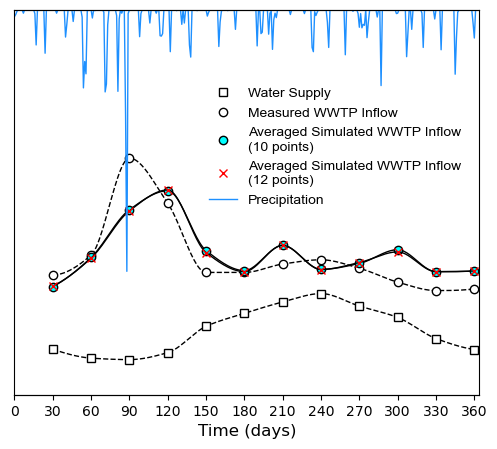

In [33]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Time vector
new_time_x = np.array([15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]) + 15

# New averaged simulated data for 10 and 12 Nodes
scenario_10nodes = np.array([0.011227649, 0.014257776, 0.019221471, 0.02118647, 0.014981269,
                             0.012898974, 0.015514118, 0.013026312, 0.013639702, 0.015067182,
                             0.012790201, 0.012854424])

scenario_12nodes = np.array([0.011277843, 0.014193241, 0.019106222, 0.021274164, 0.014773765,
                             0.012792798, 0.015518916, 0.013008701, 0.013734135, 0.014839875,
                             0.012784453, 0.01285987])

# Water supply data
dwflow_x = new_time_x
dwflow_y = np.array([0.004721554, 0.003803406, 0.003648215, 0.004376016, 0.007106057,
                     0.008454645, 0.009632263, 0.010508809, 0.00921054, 0.00802847,
                     0.005836927, 0.004693928])

# Load measured inflow and precipitation
f = np.loadtxt('WWTP_2010.txt')  # MGD
time_x = f[:, 0] + 15
flow_y = f[:, 1] * 0.043812636574074
rain_y = f[:, 3] * 0.043812636574074

prec = np.loadtxt('Precip_2010.txt')
time_day = np.arange(0, 365, 1)

# تابع برای منحنی صاف
def smooth_monotone(x, y, num=300):
    interp = PchipInterpolator(x, y)
    x_smooth = np.linspace(x.min(), x.max(), num)
    y_smooth = interp(x_smooth)
    return x_smooth, y_smooth

# Plotting
fig, ax = plt.subplots()
ax.set_ylim(0, 0.04)

# Twin axis for precipitation
ax2 = ax.twinx()
ax2.plot(time_day, prec, color="dodgerblue", lw=1, label="Precipitation")
ax.set_ylabel("")
ax.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)
ax2.set_ylabel("")
ax2.get_yaxis().set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.axis([min(time_day), max(time_day), max(prec), min(prec)])
ax2.set_ylim(200, 0)

# Water Supply smooth line
x_smooth, y_smooth = smooth_monotone(dwflow_x, dwflow_y)
ax.plot(x_smooth, y_smooth, '--k', lw=1)
ax.plot(dwflow_x, dwflow_y, 's', markerfacecolor='white', color='black', label='Water Supply')

# Measured WWTP Inflow smooth line
x_smooth, y_smooth = smooth_monotone(time_x, flow_y)
ax.plot(x_smooth, y_smooth, '--', color='black', lw=1)
ax.plot(time_x, flow_y, 'o', markerfacecolor='white', color='black', label='Measured WWTP Inflow')

# Simulated inflows smooth lines
x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_10nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)
ax.plot(new_time_x, scenario_10nodes, 'o', markerfacecolor='cyan', color='black', label='Averaged Simulated WWTP Inflow\n(10 points)')

x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_12nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)



ax.plot(new_time_x, scenario_12nodes, 'x', color='red', label='Averaged Simulated WWTP Inflow\n(12 points)')



# Legend and labels
fig.legend(loc='upper right', bbox_to_anchor=(0.89, 0.75), frameon=False, prop={'size': 10, 'family': 'Arial'})
ax.set_xticks(np.arange(0, 365, 30))
ax.set_xticklabels(np.arange(0, 365, 30), fontsize=10)
ax.set_xlabel('Time (days)', fontsize=12)

fig.set_size_inches(6, 5)
ax.text(0.01, 0.88, '', transform=ax.transAxes, fontsize=14, va='top', ha='left')

# Save outputs
plt.savefig('simopt_10,12n_pre.png', dpi=1200, bbox_inches='tight') 
plt.savefig('simopt_10,12n_pre.eps', dpi=1200, bbox_inches='tight')  

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


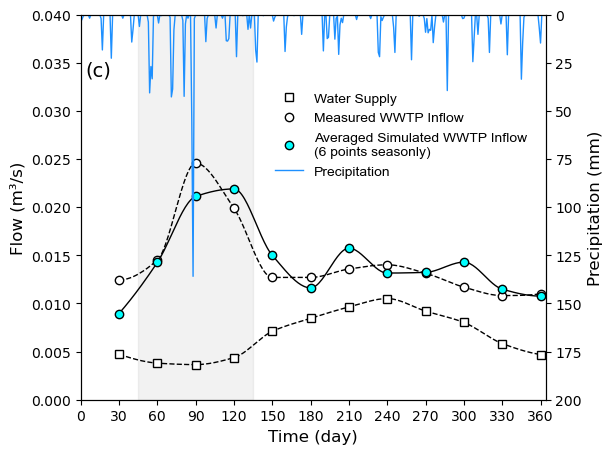

In [40]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Time vector
new_time_x = np.array([15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]) + 15

# Updated simulated data (6 point seasonally)
scenario_6nodes = np.array([
    0.008952268,
    0.014261225,
    0.021115536,
    0.021901159,
    0.015004789,
    0.011623148,
    0.015743639,
    0.013161132,
    0.013232027,
    0.014294386,
    0.011488775,
    0.010765341,   
])

# Water supply data
dwflow_x = new_time_x
dwflow_y = np.array([
    0.004721554, 0.003803406, 0.003648215, 0.004376016, 
    0.007106057, 0.008454645, 0.009632263, 0.010508809, 
    0.00921054, 0.00802847, 0.005836927, 0.004693928
])

# Load measured inflow and precipitation
f = np.loadtxt('WWTP_2010.txt')  # MGD
time_x = f[:, 0] + 15
flow_y = f[:, 1] * 0.043812636574074

prec = np.loadtxt('Precip_2010.txt')
time_day = np.arange(0, 365, 1)

# Plotting
fig, ax = plt.subplots()
ax.set_ylim(0, 0.04)

# Twin axis for precipitation
ax2 = ax.twinx()
ax2.plot(time_day, prec, color="dodgerblue", lw=1, label="Precipitation")
ax2.set_ylabel("Precipitation (mm)", color="black", fontsize=12)
ax2.axis([min(time_day), max(time_day), max(prec), min(prec)])
ax2.set_ylim(200, 0)

# Plot shaded area between 45 and 135
ax.axvspan(45, 135, color='gray', alpha=0.1)

# Monotone smooth curve function using PCHIP
def smooth_monotone(x, y, num=300):
    interp = PchipInterpolator(x, y)
    x_smooth = np.linspace(x.min(), x.max(), num)
    y_smooth = interp(x_smooth)
    return x_smooth, y_smooth

# Water Supply smooth line
x_smooth, y_smooth = smooth_monotone(dwflow_x, dwflow_y)
ax.plot(x_smooth, y_smooth, '--k', lw=1)
ax.plot(dwflow_x, dwflow_y, 's', markerfacecolor='white', color='black', label='Water Supply')

# Measured WWTP Inflow smooth line
x_smooth, y_smooth = smooth_monotone(time_x, flow_y)
ax.plot(x_smooth, y_smooth, '--', color='black', lw=1)
ax.plot(time_x, flow_y, 'o', markerfacecolor='white', color='black', label='Measured WWTP Inflow')

# Simulated inflow smooth line
x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_6nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)
ax.plot(new_time_x, scenario_6nodes, 'o', markerfacecolor='cyan', color='black',
        label='Averaged Simulated WWTP Inflow\n(6 points seasonly)')

# Legend and labels
fig.legend(loc='upper right', bbox_to_anchor=(0.89, 0.75), frameon=False, prop={'size': 10, 'family': 'Arial'})

ax.set_xlabel('Time (day)', fontsize=12)
ax.set_xticks(np.arange(0, 365, 30))
ax.set_xticklabels(np.arange(0, 365, 30), fontsize=10)
ax.set_ylabel("Flow (m³/s)", color="k", fontsize=12)
fig.set_size_inches(6, 5)

ax.text(0.01, 0.88, '(c)', transform=ax.transAxes, fontsize=14, va='top', ha='left')

# Save outputs
plt.savefig('simopt_6n_pap.png', dpi=1200, bbox_inches='tight') 
plt.savefig('simopt_6n_pap.eps', dpi=1200, bbox_inches='tight')  

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


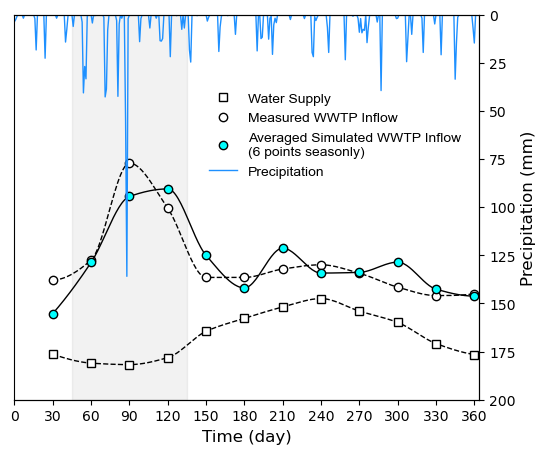

In [5]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Time vector
new_time_x = np.array([15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]) + 15

# Updated simulated data (6 point seasonally)
scenario_6nodes = np.array([
    0.008952268,
    0.014261225,
    0.021115536,
    0.021901159,
    0.015004789,
    0.011623148,
    0.015743639,
    0.013161132,
    0.013232027,
    0.014294386,
    0.011488775,
    0.010765341,
])

# Water supply data
dwflow_x = new_time_x
dwflow_y = np.array([0.004721554, 0.003803406, 0.003648215, 0.004376016, 
                     0.007106057, 0.008454645, 0.009632263, 0.010508809, 
                     0.00921054, 0.00802847, 0.005836927, 0.004693928])

# Load measured inflow and precipitation
f = np.loadtxt('WWTP_2010.txt')  # MGD
time_x = f[:, 0] + 15
flow_y = f[:, 1] * 0.043812636574074

prec = np.loadtxt('Precip_2010.txt')
time_day = np.arange(0, 365, 1)

# Plotting
fig, ax = plt.subplots()
ax.set_ylim(0, 0.04)

# Twin axis for precipitation
ax2 = ax.twinx()
ax2.plot(time_day, prec, color="dodgerblue", lw=1, label="Precipitation")
ax2.set_ylabel("Precipitation (mm)", color="black", fontsize=12)
ax2.axis([min(time_day), max(time_day), max(prec), min(prec)])
ax2.set_ylim(200, 0)

# Plot shaded area between 45 and 135
ax.axvspan(45, 135, color='gray', alpha=0.1)

# Smooth monotone curve function using PCHIP
def smooth_monotone(x, y, num=300):
    interp = PchipInterpolator(x, y)
    x_smooth = np.linspace(x.min(), x.max(), num)
    y_smooth = interp(x_smooth)
    return x_smooth, y_smooth

# Water Supply smooth line
x_smooth, y_smooth = smooth_monotone(dwflow_x, dwflow_y)
ax.plot(x_smooth, y_smooth, '--k', lw=1)
ax.plot(dwflow_x, dwflow_y, 's', markerfacecolor='white', color='black', label='Water Supply')

# Measured WWTP Inflow smooth line
x_smooth, y_smooth = smooth_monotone(time_x, flow_y)
ax.plot(x_smooth, y_smooth, '--', color='black', lw=1)
ax.plot(time_x, flow_y, 'o', markerfacecolor='white', color='black', label='Measured WWTP Inflow')

# Simulated inflow smooth line
x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_6nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)
ax.plot(new_time_x, scenario_6nodes, 'o', markerfacecolor='cyan', color='black',
        label='Averaged Simulated WWTP Inflow\n(6 points seasonly)')

# حذف محور عمودی سمت چپ
ax.set_ylabel("")
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
ax.spines['left'].set_visible(False)

# Legend
fig.legend(loc='upper right', bbox_to_anchor=(0.89, 0.75), frameon=False,
           prop={'size': 10, 'family': 'Arial'})

# محور افقی
ax.set_xlabel('Time (day)', fontsize=12)
ax.set_xticks(np.arange(0, 365, 30))
ax.set_xticklabels(np.arange(0, 365, 30), fontsize=10)

# سایز و برچسب گوشه
fig.set_size_inches(6, 5)
ax.text(0.01, 0.88, '', transform=ax.transAxes, fontsize=14, va='top', ha='left')

# ذخیره خروجی
plt.savefig('simopt_6n_pre.png', dpi=1200, bbox_inches='tight') 
plt.savefig('simopt_6n_pre.eps', dpi=1200, bbox_inches='tight')  

plt.show()


In [34]:
from PIL import Image

images_paths = [
    'simopt_6,8n_pre.png',
    'simopt_10,12n_pre.png',
    'simopt_6n_pre.png'
]

target_height = 400  # ارتفاع ثابت

images = []
for path in images_paths:
    img = Image.open(path)
    ratio = target_height / img.height
    new_width = int(img.width * ratio)
    # جایگزین کردن ANTIALIAS با Resampling.LANCZOS
    img_resized = img.resize((new_width, target_height), Image.Resampling.LANCZOS)
    images.append(img_resized)

total_width = sum(img.width for img in images)
combined_img = Image.new('RGBA', (total_width, target_height), (255, 255, 255, 0))

x_offset = 0
for img in images:
    combined_img.paste(img, (x_offset, 0))
    x_offset += img.width


combined_img.save('combined_horizontal.png')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


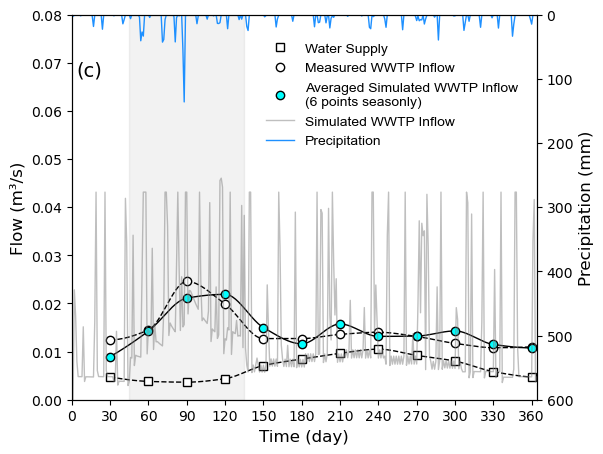

In [19]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator
import pandas as pd
import numpy as np


# Time vector
new_time_x = np.array([15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]) + 15

# Updated simulated data (6 point seasonally)
scenario_6nodes = np.array([
    0.008952268,
    0.014261225,
    0.021115536,
    0.021901159,
    0.015004789,
    0.011623148,
    0.015743639,
    0.013161132,
    0.013232027,
    0.014294386,
    0.011488775,
    0.010765341,   
])

# Water supply data
dwflow_x = new_time_x
dwflow_y = np.array([
    0.004721554, 0.003803406, 0.003648215, 0.004376016, 
    0.007106057, 0.008454645, 0.009632263, 0.010508809, 
    0.00921054, 0.00802847, 0.005836927, 0.004693928
])

# Load measured inflow and precipitation
f = np.loadtxt('WWTP_2010.txt')  # MGD
time_x = f[:, 0] + 15
flow_y = f[:, 1] * 0.043812636574074

prec = np.loadtxt('Precip_2010.txt')
time_day = np.arange(0, 365, 1)




# Load daily flow (12 nodes) and its time (single column files)
daily_values = pd.read_csv('daily flow_6 nodes_seasonly.csv', header=None)[0].values
daily_time   = pd.read_csv('t.csv', header=None)[0].values





# Plotting
fig, ax = plt.subplots()
ax.set_ylim(0, 0.08)

# Twin axis for precipitation
ax2 = ax.twinx()
ax2.plot(time_day, prec, color="dodgerblue", lw=1, label="Precipitation")
ax2.set_ylabel("Precipitation (mm)", color="black", fontsize=12)
ax2.axis([min(time_day), max(time_day), max(prec), min(prec)])
ax2.set_ylim(600, 0)

# Plot shaded area between 45 and 135
ax.axvspan(45, 135, color='gray', alpha=0.1)

# Monotone smooth curve function using PCHIP
def smooth_monotone(x, y, num=300):
    interp = PchipInterpolator(x, y)
    x_smooth = np.linspace(x.min(), x.max(), num)
    y_smooth = interp(x_smooth)
    return x_smooth, y_smooth

# Water Supply smooth line
x_smooth, y_smooth = smooth_monotone(dwflow_x, dwflow_y)
ax.plot(x_smooth, y_smooth, '--k', lw=1)
ax.plot(dwflow_x, dwflow_y, 's', markerfacecolor='white', color='black', label='Water Supply')

# Measured WWTP Inflow smooth line
x_smooth, y_smooth = smooth_monotone(time_x, flow_y)
ax.plot(x_smooth, y_smooth, '--', color='black', lw=1)
ax.plot(time_x, flow_y, 'o', markerfacecolor='white', color='black', label='Measured WWTP Inflow')

# Simulated inflow smooth line
x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_6nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)
ax.plot(new_time_x, scenario_6nodes, 'o', markerfacecolor='cyan', color='black',
        label='Averaged Simulated WWTP Inflow\n(6 points seasonly)')




# Plot daily flow for  as a simple light gray line
ax.plot(daily_time, daily_values, color='gray', lw=1, alpha=0.5, label='Simulated WWTP Inflow')







# Legend and labels
fig.legend(loc='upper right', bbox_to_anchor=(0.89, 0.85), frameon=False, prop={'size': 10, 'family': 'Arial'})

ax.set_xlabel('Time (day)', fontsize=12)
ax.set_xticks(np.arange(0, 365, 30))
ax.set_xticklabels(np.arange(0, 365, 30), fontsize=10)
ax.set_ylabel("Flow (m³/s)", color="k", fontsize=12)
fig.set_size_inches(6, 5)

ax.text(0.01, 0.88, '(c)', transform=ax.transAxes, fontsize=14, va='top', ha='left')

# Save outputs
plt.savefig('simopt_6n_pap1.png', dpi=1200, bbox_inches='tight') 
plt.savefig('simopt_6n_pap1.eps', dpi=1200, bbox_inches='tight')  

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


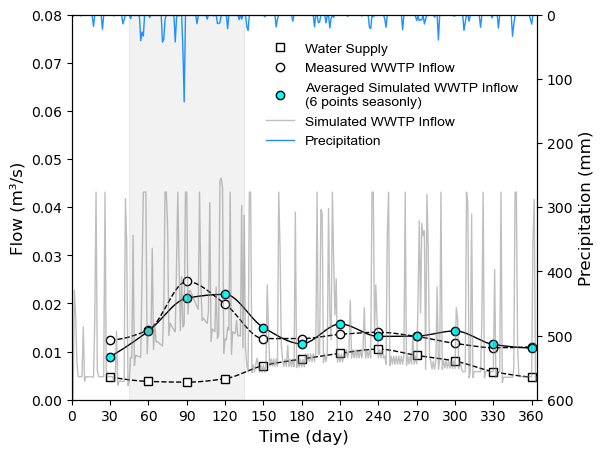

In [20]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator
import pandas as pd
import numpy as np


# Time vector
new_time_x = np.array([15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]) + 15

# Updated simulated data (6 point seasonally)
scenario_6nodes = np.array([
    0.008952268,
    0.014261225,
    0.021115536,
    0.021901159,
    0.015004789,
    0.011623148,
    0.015743639,
    0.013161132,
    0.013232027,
    0.014294386,
    0.011488775,
    0.010765341,   
])

# Water supply data
dwflow_x = new_time_x
dwflow_y = np.array([
    0.004721554, 0.003803406, 0.003648215, 0.004376016, 
    0.007106057, 0.008454645, 0.009632263, 0.010508809, 
    0.00921054, 0.00802847, 0.005836927, 0.004693928
])

# Load measured inflow and precipitation
f = np.loadtxt('WWTP_2010.txt')  # MGD
time_x = f[:, 0] + 15
flow_y = f[:, 1] * 0.043812636574074

prec = np.loadtxt('Precip_2010.txt')
time_day = np.arange(0, 365, 1)




# Load daily flow (12 nodes) and its time (single column files)
daily_values = pd.read_csv('daily flow_6 nodes_seasonly.csv', header=None)[0].values
daily_time   = pd.read_csv('t.csv', header=None)[0].values





# Plotting
fig, ax = plt.subplots()
ax.set_ylim(0, 0.08)

# Twin axis for precipitation
ax2 = ax.twinx()
ax2.plot(time_day, prec, color="dodgerblue", lw=1, label="Precipitation")
ax2.set_ylabel("Precipitation (mm)", color="black", fontsize=12)
ax2.axis([min(time_day), max(time_day), max(prec), min(prec)])
ax2.set_ylim(600, 0)

# Plot shaded area between 45 and 135
ax.axvspan(45, 135, color='gray', alpha=0.1)

# Monotone smooth curve function using PCHIP
def smooth_monotone(x, y, num=300):
    interp = PchipInterpolator(x, y)
    x_smooth = np.linspace(x.min(), x.max(), num)
    y_smooth = interp(x_smooth)
    return x_smooth, y_smooth

# Water Supply smooth line
x_smooth, y_smooth = smooth_monotone(dwflow_x, dwflow_y)
ax.plot(x_smooth, y_smooth, '--k', lw=1)
ax.plot(dwflow_x, dwflow_y, 's', markerfacecolor='white', color='black', label='Water Supply')

# Measured WWTP Inflow smooth line
x_smooth, y_smooth = smooth_monotone(time_x, flow_y)
ax.plot(x_smooth, y_smooth, '--', color='black', lw=1)
ax.plot(time_x, flow_y, 'o', markerfacecolor='white', color='black', label='Measured WWTP Inflow')

# Simulated inflow smooth line
x_smooth, y_smooth = smooth_monotone(new_time_x, scenario_6nodes)
ax.plot(x_smooth, y_smooth, '-', color='black', lw=1)
ax.plot(new_time_x, scenario_6nodes, 'o', markerfacecolor='cyan', color='black',
        label='Averaged Simulated WWTP Inflow\n(6 points seasonly)')




# Plot daily flow for  as a simple light gray line
ax.plot(daily_time, daily_values, color='gray', lw=1, alpha=0.5, label='Simulated WWTP Inflow')







# Legend and labels
fig.legend(loc='upper right', bbox_to_anchor=(0.89, 0.85), frameon=False, prop={'size': 10, 'family': 'Arial'})

ax.set_xlabel('Time (day)', fontsize=12)
ax.set_xticks(np.arange(0, 365, 30))
ax.set_xticklabels(np.arange(0, 365, 30), fontsize=10)
ax.set_ylabel("Flow (m³/s)", color="k", fontsize=12)
fig.set_size_inches(6, 5)

ax.text(0.01, 0.88, '', transform=ax.transAxes, fontsize=14, va='top', ha='left')

# Save outputs
plt.savefig('simopt_6n_SI.png', dpi=1200, bbox_inches='tight') 
plt.savefig('simopt_6n_SI.eps', dpi=1200, bbox_inches='tight')  

plt.show()


In [29]:
from PIL import Image

# نام فایل‌های تصاویر
images = ['simopt_6_8n.png', 'simopt_10_12n.png', 'simopt_6n_pap.png']

# بارگذاری تصاویر
imgs = [Image.open(i) for i in images]

# پیدا کردن عرض بیشینه
max_width = max(i.width for i in imgs)
# جمع ارتفاع‌ها
total_height = sum(i.height for i in imgs)

# ایجاد تصویر خالی
new_im = Image.new('RGB', (max_width, total_height), color=(255,255,255))

# قرار دادن تصاویر یکی زیر دیگری
y_offset = 0
for im in imgs:
    new_im.paste(im, (0, y_offset))
    y_offset += im.height

# ذخیره تصویر نهایی
new_im.save('combined_vertical.png', dpi=(300,300))
new_im.show()
